In [3]:
import argparse
import torch
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
import matplotlib.pyplot as plt
import numpy as np
from torch.distributions import Normal
import os
import random

import matplotlib.pyplot as plt
from IPython.display import clear_output
import pickle
import seaborn as sns

save = False
path = os.getcwd()
# # Use this path if Loading Dataset
# rgb_dir = os.path.dirname(path) 
# data_dir = os.path.dirname(rgb_dir) + "/data/rgb/data/"

# Use this if testing results generated from code
data_dir = path + "/results/"

print(data_dir)

/home/ahalya/Documents/projects/mechanical-intelligence/rgb/src/results/


In [2]:
dir_path1 = data_dir + "ergodic/"
# Load Pickled Data
file_path1 = dir_path1 + "data_eval_dict.pickle"
with open(file_path1, 'rb') as f: 
    data_dict1 = pickle.load(f, encoding="bytes")
    print(data_dict1.keys())
obj1 = data_dict1['obj_loc']
traj1 = data_dict1['path']
loss1 = data_dict1['losses']
buffer1 = data_dict1['buffer']
action1 = data_dict1['actions']
env_traj1 = data_dict1['env_path']
env_lim = data_dict1['tray_lim']
klerg_lim = data_dict1['klerg_lim']


dir_path2 = data_dir + "random/"
# Load Pickled Data
file_path2 = dir_path2 + "data_eval_dict.pickle"
with open(file_path2, 'rb') as f: 
    data_dict2 = pickle.load(f, encoding="bytes")
    print(data_dict2.keys())
traj2 = data_dict2['path']
loss2 = data_dict2['losses']
buffer2 = data_dict2['buffer']
action2 = data_dict2['actions']
env_traj2 = data_dict2['env_path']
# env_lim = data_dict2['tray_lim']
# klerg_lim = data_dict2['klerg_lim']

dict_keys(['path', 'actions', 'buffer', 'env_path', 'obj_loc', 'obj2_loc', 'losses', 'tray_lim', 'klerg_lim'])
dict_keys(['path', 'actions', 'buffer', 'env_path', 'obj_loc', 'obj2_loc', 'losses', 'tray_lim', 'klerg_lim'])


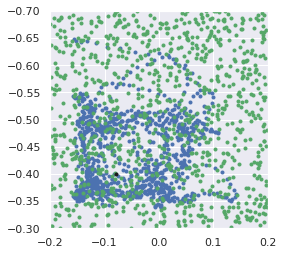

In [3]:
sns.set(style='darkgrid')
# Plot Traj
fig = plt.figure()
fig.patch.set_facecolor('white')
env_traj1 = np.array(env_traj1)
plt.plot(env_traj1[:,0], env_traj1[:,2],'b.')
env_traj2 = np.array(env_traj2)
plt.plot(env_traj2[:,0], env_traj2[:,2],'g.')


plt.plot(obj1[0], obj1[2],'k.')
plt.axis('square')
plt.xlim(env_lim[0])
plt.ylim(env_lim[1])
plt.show()


In [4]:
# Load Pytorch Models
# model1 = torch.load("model_int_check.pth")
# model1 = VAE(input_dim=5120,  z_dim=6,s_dim=2,  img_dim=5,
#             hidden_dim=16)
model1 = torch.load(dir_path1 + "model_final_postlearning.pth",
                   map_location=torch.device('cpu'))
model1.eval()

model1.eval()
# model1.load_state_dict(torch.load(dir_path1 + "model_checkpoint_iter"+str(19850)+".pth"))


# Load Pytorch Models
# model2 = torch.load("model_int_check.pth")
model2 = torch.load(dir_path2 + "model_final_postlearning.pth", map_location=torch.device('cpu'))
model2.eval()


/home/ahalya/python-envs/sensory-learning/lib/python3.8/site-packages/torch/serialization.py:786: SourceChangeWarning: source code of class 'vae.vae.VAE' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/ahalya/python-envs/sensory-learning/lib/python3.8/site-packages/torch/serialization.py:786: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/ahalya/python-envs/sensory-learning/lib/python3.8/site-packages/torch/serialization.py:786: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the

VAE(
  (encoder): Sequential(
    (0): Conv2d(3, 5, kernel_size=(5, 5), stride=(2, 2))
    (1): ReLU()
    (2): Conv2d(5, 5, kernel_size=(5, 5), stride=(1, 1))
    (3): Flatten()
  )
  (encode): Sequential(
    (0): Linear(in_features=5122, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=32, bias=True)
  )
  (img_decoder): Sequential(
    (0): UnFlatten()
    (1): ConvTranspose2d(5, 5, kernel_size=(5, 5), stride=(1, 1))
    (2): ReLU()
    (3): ConvTranspose2d(5, 3, kernel_size=(5, 5), stride=(2, 2))
  )
  (imgvar_decoder): Sequential(
    (0): Linear(in_features=18, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=1, bias=True)
  )
  (img_decode): Sequential(
    (0): Linear(in_features=18, out_features=128, bias=True)
    (1): ReLU()
    (2): Line

In [5]:
dir_path = data_dir + "test_data/"
# Load Pickled Data
file_path = dir_path + "data_eval_dict.pickle"
with open(file_path, 'rb') as f: 
    data_dict = pickle.load(f, encoding="bytes")
    print(data_dict.keys())
testobj1 = data_dict['obj_loc']
testtraj = data_dict['path']
testbuffer = data_dict['buffer']
test_env_traj = data_dict['env_path']
test_env_lim = data_dict['tray_lim']
test_klerg_lim = data_dict['klerg_lim']
print(testobj1)

dict_keys(['path', 'buffer', 'env_path', 'obj_loc', 'obj2_loc', 'tray_lim', 'klerg_lim'])
(-0.08, -0.1, -0.4)


In [6]:
ycheck1 = [None]*len(testbuffer)
ycheck2 = [None]*len(testbuffer)

with torch.no_grad():
    xt = np.expand_dims(testbuffer[0][0], axis=0)
    yt = np.expand_dims(testbuffer[0][1], axis=0)

    xt = torch.FloatTensor(xt)#.squeeze()
    yt = torch.FloatTensor(yt)#.squeeze()
    print(xt.shape, yt.shape)
    _, _ , z_mu1, z_logvar1, _ = model1(xt, yt)
    z_samples1 = model1.reparameterize(z_mu1, z_logvar1)

    _, _ , z_mu2, z_logvar2, _ = model2(xt, yt)
    z_samples2 = model2.reparameterize(z_mu2, z_logvar2)

    ind = 0
    for i in range(int(len(testbuffer)/2)):    
        xc = np.expand_dims(testbuffer[ind][0], axis=0)
        xc = torch.FloatTensor(xc)#.squeeze()

        y_pred = model1.img_decode(torch.cat([z_samples1, xc], dim=1))
        img_pred1 = model1.img_decoder(y_pred)
        ycheck1[ind] = img_pred1[0].detach().numpy().T
#         print(ycheck1[ind].shape)


        y_pred = model2.img_decode(torch.cat([z_samples2, xc], dim=1))
        img_pred2 = model2.img_decoder(y_pred)
        ycheck2[ind] = img_pred2[0].detach().numpy().T
#         print(ycheck2[ind].shape)
        
        ind +=1
        
    print(ind)


torch.Size([1, 2]) torch.Size([1, 3, 75, 75])
9


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

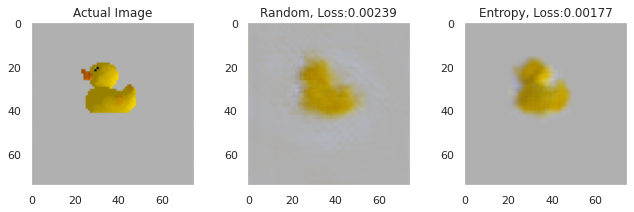

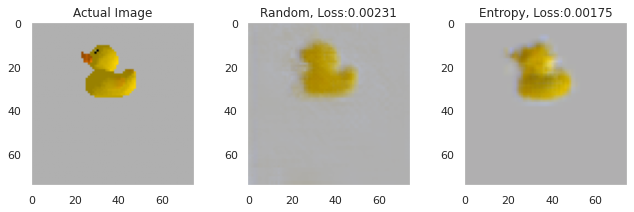

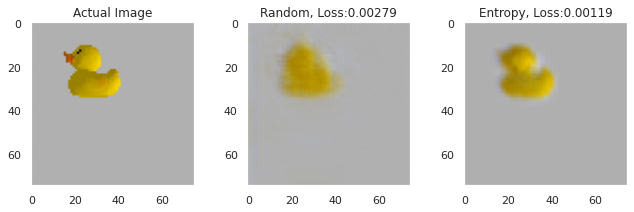

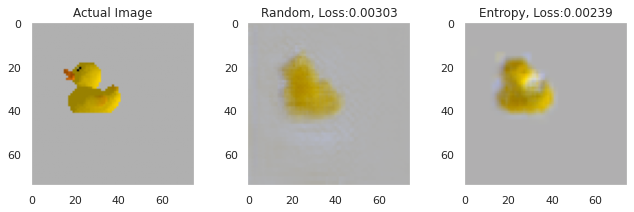

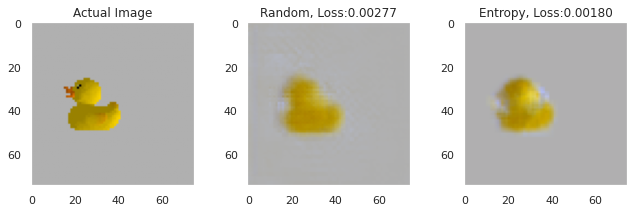

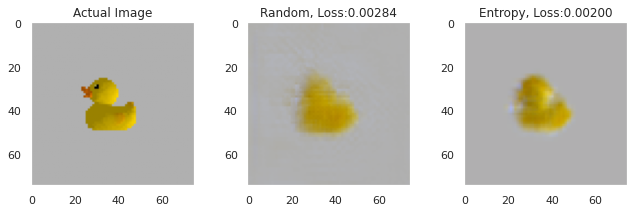

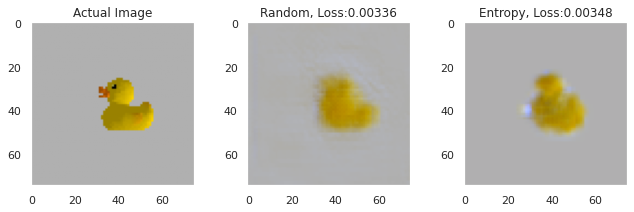

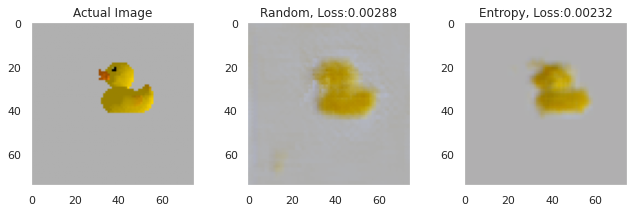

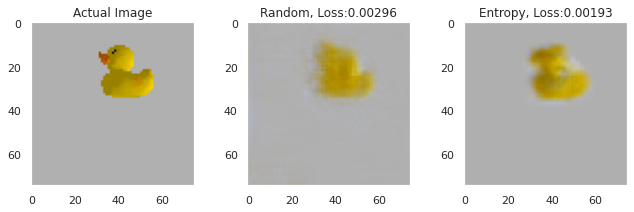

In [7]:
def mseloss(A,B): return np.square(np.subtract(A, B)).mean()

sns.set_style("dark")

for i in range(int(len(testbuffer)/2)):
    fig, axes = plt.subplots(1,3, figsize=(11, 3))
    axes[0].imshow(testbuffer[i][1].T)
    axes[0].set_title('Actual Image')
    axes[1].imshow((ycheck2[i]))
    axes[1].set_title("Random, Loss:{:.5f}".format(mseloss(ycheck2[i].T, testbuffer[i][1])))
    axes[2].imshow((ycheck1[i]))
    axes[2].set_title("Entropy, Loss:{:.5f}".format(mseloss(ycheck1[i].T, testbuffer[i][1])))
 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


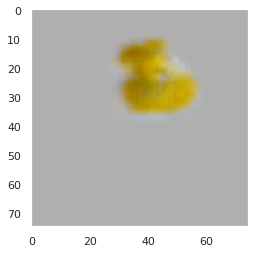

In [8]:
from IPython.display import clear_output
sns.set_style("dark")

for i in range(int(len(testbuffer)/2)):
    clear_output(wait=True)
    plt.imshow(testbuffer[i][1].T)
    if save: plt.savefig("figures/rgb/gifdata/"+str(i)+"_actual.png")
    plt.imshow((ycheck2[i]))
    if save: plt.savefig("figures/rgb/gifdata/"+str(i)+"_rand_est.png")
    plt.imshow((ycheck1[i]))
    if save: plt.savefig("figures/rgb/gifdata/"+str(i)+"_ent_est.png")


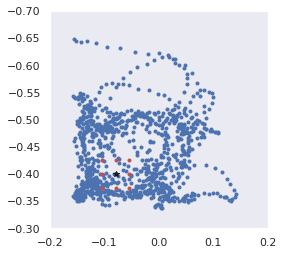

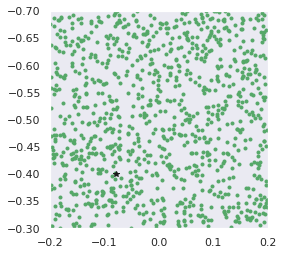

In [9]:
fig = plt.figure()
fig.patch.set_facecolor('white')
env_traj1 = np.array(env_traj1)
plt.plot(env_traj1[:,0], env_traj1[:,2],'b.')

plt.plot(np.array(test_env_traj)[:9,0], np.array(test_env_traj)[:9,2], 'r.')
plt.plot(obj1[0], obj1[2],'k*')
plt.axis('square')
plt.xlim(env_lim[0])
plt.ylim(env_lim[1])
if save: plt.savefig('figures/rgb/entropy_traj.pdf')#_wtestdata.pdf')
plt.show()

fig = plt.figure()
fig.patch.set_facecolor('white')
env_traj1 = np.array(env_traj1)
plt.plot(env_traj2[:,0], env_traj2[:,2],'g.')

# plt.plot(np.array(test_env_traj)[:,0], np.array(test_env_traj)[:,2], 'r.')
plt.plot(obj1[0], obj1[2],'k*')

plt.axis('square')
plt.xlim(env_lim[0])
plt.ylim(env_lim[1])
if save: plt.savefig('figures/rgb/random_traj.pdf')#_wtestdata.pdf')
plt.show()

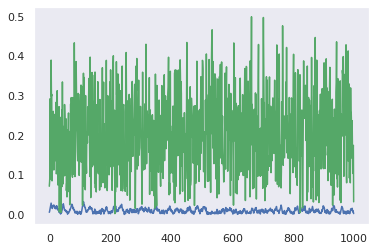

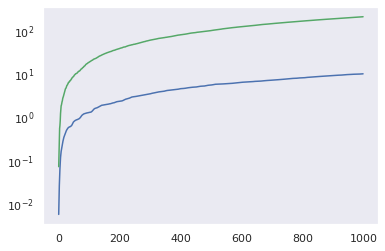

In [10]:
energy1 = [np.linalg.norm(env_traj1[i+1]-env_traj1[i]) for i in range(len(env_traj1)-1)]
plt.plot(energy1,'b')
energy2 = [np.linalg.norm(env_traj2[i+1]-env_traj2[i]) for i in range(len(env_traj2)-1)]
plt.plot(energy2,'g')
# plt.plot(np.linalg.norm(action2, axis=1))
if save: plt.savefig('figures/rgb/logenergy_vs_time.pdf')
plt.show()
plt.semilogy(np.cumsum(energy1),'b')
plt.semilogy(np.cumsum(energy2),'g')
if save: plt.savefig('figures/rgb/logcumenergy_vs_time.pdf')


In [11]:
loss1 = []
loss2 = []
mseloss1 = [None]*len(testbuffer)
mseloss2 = [None]*len(testbuffer)

with torch.no_grad():
    for cp in range(50,19850,50):
        PATH =  dir_path1 + "model_checkpoint_iter"+str(cp)+".pth"
        model1.load_state_dict(torch.load(PATH, map_location=torch.device('cpu'))['state_dict'])
        model1.eval()

        PATH =  dir_path2 + "model_checkpoint_iter"+str(cp)+".pth"
        model2.load_state_dict(torch.load(PATH, map_location=torch.device('cpu'))['state_dict'])
        model2.eval()

        xt = np.expand_dims(testbuffer[2][0], axis=0)
        yt = np.expand_dims(testbuffer[2][1], axis=0)

        xt = torch.FloatTensor(xt)#.squeeze()
        yt = torch.FloatTensor(yt)#.squeeze()
        _, _ , z_mu1, z_logvar1, _ = model1(xt, yt)
        z_samples1 = model1.reparameterize(z_mu1, z_logvar1)

        _, _ , z_mu2, z_logvar2, _ = model2(xt, yt)
        z_samples2 = model2.reparameterize(z_mu2, z_logvar2)

        ind = 0
        for i in range(len(testbuffer)):

            xc = np.expand_dims(testbuffer[ind][0], axis=0)
            xc = torch.FloatTensor(xc)#.squeeze()

            y_pred = model1.img_decode(torch.cat([z_samples1, xc], dim=1))
            img_pred1 = model1.img_decoder(y_pred)
            ycheck1[ind] = img_pred1[0].detach().numpy().T
            mseloss1[ind] = mseloss(ycheck1[i].T, testbuffer[i][1])

    #         print(ycheck1[ind].shape)


            y_pred = model2.img_decode(torch.cat([z_samples2, xc], dim=1))
            img_pred2 = model2.img_decoder(y_pred)
            ycheck2[ind] = img_pred2[0].detach().numpy().T
            mseloss2[ind] = mseloss(ycheck2[i].T, testbuffer[i][1])
    #         print(ycheck2[ind].shape)

            ind +=1

        loss1.append(mseloss1.copy())
        loss2.append(mseloss2.copy())


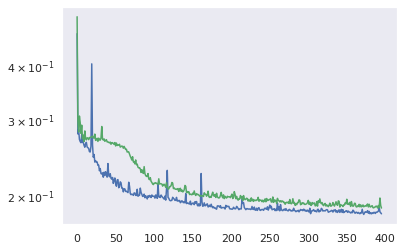

In [12]:
loss1 = np.array(loss1)
loss2 = np.array(loss2)

plt.semilogy(np.sum(loss1, axis=1), 'b')
plt.semilogy(np.sum(loss2, axis=1),'g')
if save: plt.savefig('figures/rgb/logtestinglossovertime.pdf')
plt.show()

